<a href="https://colab.research.google.com/github/vshiv667/Rock_Paper_Scissors/blob/master/Rock_Paper_Scissors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Locate and save data to directory

In [0]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2020-05-31 16:33:08--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.203.128, 2404:6800:4008:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M   130MB/s    in 1.5s    

2020-05-31 16:33:10 (130 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2020-05-31 16:33:11--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 2404:6800:4008:c01::80
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tmp/rps-test-set.zip’

/tmp/r

# Extract the data to the expected format

In [0]:
import os
import zipfile

# Training Data Set
local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

# Validation Data Set
local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

# Finding training instances of Rock / Paper / Scissors images

In [0]:
rock_dir = os.path.join('/tmp/rps/rock')
rock_files = os.listdir(rock_dir)

paper_dir =  os.path.join('/tmp/rps/paper')
paper_files = os.listdir(paper_dir)

scissors_dir = os.path.join('/tmp/rps/scissors')
scissors_files = os.listdir(scissors_dir)

print('Number of training rock images:', len(os.listdir(rock_dir)))
print('Number of training paper images:', len(os.listdir(paper_dir)))
print('Number of training scissors images:', len(os.listdir(scissors_dir)))

Number of training rock images: 840
Number of training paper images: 840
Number of training scissors images: 840


# View Training Images

Rock image at: 0


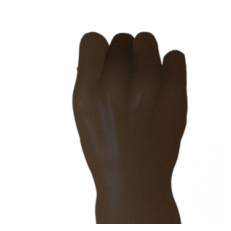

Paper image at: 0


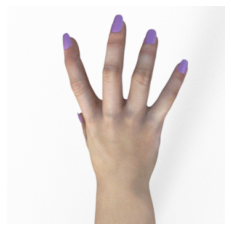

Scissors image at: 0


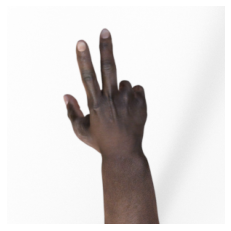

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 0

print("Rock image at: {}".format(pic_index))
plt.axis('Off')
img = mpimg.imread(os.path.join(rock_dir, rock_files[pic_index]))
plt.imshow(img)
plt.show()

print("Paper image at: {}".format(pic_index))
plt.axis('Off')
img = mpimg.imread(os.path.join(paper_dir, paper_files[pic_index]))
plt.imshow(img)
plt.show()

print("Scissors image at: {}".format(pic_index))
plt.axis('Off')
img = mpimg.imread(os.path.join(scissors_dir, scissors_files[pic_index]))
plt.imshow(img)
plt.show()

Rock image at: 128


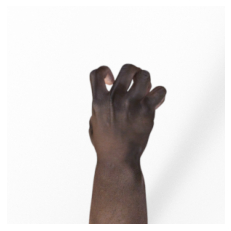

Paper image at: 128


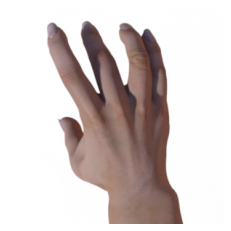

Scissors image at: 128


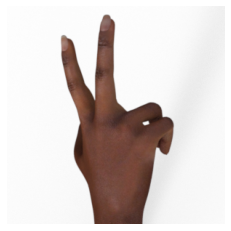

In [0]:
pic_index = 128

print("Rock image at: {}".format(pic_index))
plt.axis('Off')
img = mpimg.imread(os.path.join(rock_dir, rock_files[pic_index]))
plt.imshow(img)
plt.show()

print("Paper image at: {}".format(pic_index))
plt.axis('Off')
img = mpimg.imread(os.path.join(paper_dir, paper_files[pic_index]))
plt.imshow(img)
plt.show()

print("Scissors image at: {}".format(pic_index))
plt.axis('Off')
img = mpimg.imread(os.path.join(scissors_dir, scissors_files[pic_index]))
plt.imshow(img)
plt.show()

# Build Convolutional Neural Network Model

In [0]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop

training_directory = "/tmp/rps/"
training_datagen = ImageDataGenerator( # Augment Training Images to improve generalization
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


validation_dir = "/tmp/rps-test-set/"
validation_datagen = ImageDataGenerator( rescale =1./255 )

train_generator = training_datagen.flow_from_directory(
    training_directory,
    target_size=(150,150), #each image is 150 x 150 pixels
    batch_size=20, #no. of images in each step
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    batch_size=10,
    target_size=(150,150),
    class_mode='categorical'
)

model = tf.keras.models.Sequential([
    # First 2D convolution layer with 64 neurons and 3x3 filter
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)), #each image is 150 x 150 pixels, 24-bit color
    tf.keras.layers.MaxPooling2D(2, 2), # 2x2 sliding window size
    # Second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to 1D feed into a DNN
    tf.keras.layers.Flatten(),
    # Add dropout layer to avoid overfitting
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), #Layer 1 with ReLu activation function giving max(0,val)
    tf.keras.layers.Dense(3, activation='softmax') #Ouput Layer with 3 labels and probabilities of each class using softmax activation fucntion
])

model.summary() #view summary
#3 x 3 x 64 convolutions + 64 = 1792 params vs. 150 x 150 image ~ 22500 params. In Convolution no. of params is independent of size of original image.
#150 x 150 -> 148 x 148 with 3 x 3 filter in Convolution 2D
#148 x 148 -> 74 x 74 with 2 x 2 window in MaxPooling
#7 x 7 x 128 -> 1 x 6272 Flatten array
#6272*512 neurons + 512 (bias units)  -> 3,211,776‬ params in hidden layer
#512*3 neurons + 3 (bias units)  -> 1539 params in output layer

model.compile(loss = 'categorical_crossentropy', optimizer=RMSprop(lr=1e-4), metrics=['accuracy']) 
#using cce loss function as targets are one hot encoded, setting learning rate and desired metric
             

history = model.fit(train_generator, steps_per_epoch=126, epochs=25, validation_data = validation_generator, validation_steps=37, verbose = 1) 
#each epoch: 126 steps*20 batch size= 2520 Training Images (i.e.840*3)

model.save("rps.h5") #save model 


Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_______________________________________

#Visualize train & valid accuracy

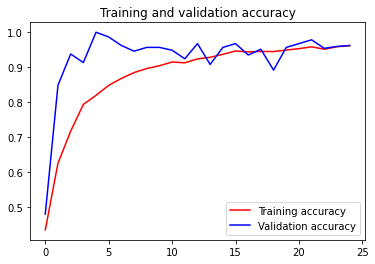

<Figure size 432x288 with 0 Axes>

In [0]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

# Upload Image to test 
(should have white background)

In [0]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload() #uploaded photos taken on my phone

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving vivek_paper.JPG to vivek_paper.JPG
Saving vivek_rock.JPG to vivek_rock.JPG
Saving vivek_scissors.JPG to vivek_scissors.JPG
Saving vivek_scissors2.JPG to vivek_scissors2.JPG
vivek_paper.JPG
[[0. 1. 0.]]
vivek_rock.JPG
[[1. 0. 0.]]
vivek_scissors.JPG
[[0.0000000e+00 1.3827768e-04 9.9986172e-01]]
vivek_scissors2.JPG
[[1. 0. 0.]]
